In [65]:
import pandas as pd
import numpy as np
import math

In [2]:
wine_ds = pd.read_csv("C:/Users/Othman/Downloads/winequality-red.csv", sep=";")
wine_ds.insert(11, 'bias', 1)
wine_ds.head(n=20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,bias,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,1,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,1,5


In [3]:
wine_ds = wine_ds.sample(frac=1).reset_index(drop=True)

In [4]:
train_ds = wine_ds.iloc[0:800]
test_ds = wine_ds.iloc[800:]

In [5]:
train_ds.head(n=20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,bias,quality
0,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.99660,3.17,0.66,9.8,1,5
1,8.3,0.260,0.37,1.4,0.076,8.0,23.0,0.99740,3.26,0.70,9.6,1,6
2,7.7,0.640,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,1,5
3,9.3,0.330,0.45,1.5,0.057,19.0,37.0,0.99498,3.18,0.89,11.1,1,7
4,7.8,0.640,0.00,1.9,0.072,27.0,55.0,0.99620,3.31,0.63,11.0,1,5
5,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,1,5
6,9.5,0.735,0.10,2.1,0.079,6.0,31.0,0.99860,3.23,0.56,10.1,1,6
7,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,1,6
8,8.0,0.390,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0,1,5
9,6.9,0.410,0.33,2.2,0.081,22.0,36.0,0.99490,3.41,0.75,11.1,1,6


In [6]:
test_ds.head(n=20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,bias,quality
800,8.3,0.490,0.36,1.80,0.222,6.0,16.0,0.99800,3.18,0.60,9.5,1,6
801,6.7,0.460,0.24,1.70,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,1,6
802,7.3,0.510,0.18,2.10,0.070,12.0,28.0,0.99768,3.52,0.73,9.5,1,6
803,7.5,0.640,0.00,2.40,0.077,18.0,29.0,0.99650,3.32,0.60,10.0,1,6
804,5.8,0.290,0.26,1.70,0.063,3.0,11.0,0.99150,3.39,0.54,13.5,1,6
805,6.7,0.750,0.12,2.00,0.086,12.0,80.0,0.99580,3.38,0.52,10.1,1,5
806,13.0,0.470,0.49,4.30,0.085,6.0,47.0,1.00210,3.30,0.68,12.7,1,6
807,8.8,0.300,0.38,2.30,0.060,19.0,72.0,0.99543,3.39,0.72,11.8,1,6
808,8.2,0.420,0.49,2.60,0.084,32.0,55.0,0.99880,3.34,0.75,8.7,1,6
809,5.6,0.500,0.09,2.30,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,1,5


In [7]:
mean = train_ds.mean(axis=0)
std = train_ds.std(axis=0)

print(mean)
print(std)

fixed acidity            8.324500
volatile acidity         0.526687
citric acid              0.273825
residual sugar           2.520687
chlorides                0.086516
free sulfur dioxide     15.628750
total sulfur dioxide    45.468750
density                  0.996661
pH                       3.310687
sulphates                0.658475
alcohol                 10.486146
bias                     1.000000
quality                  5.668750
dtype: float64
fixed acidity            1.735617
volatile acidity         0.177570
citric acid              0.200602
residual sugar           1.344581
chlorides                0.046567
free sulfur dioxide     10.506494
total sulfur dioxide    33.895457
density                  0.001876
pH                       0.156238
sulphates                0.171195
alcohol                  1.083086
bias                     0.000000
quality                  0.798323
dtype: float64


In [8]:
for column in train_ds:
    if column != 'bias':
        train_ds[column] = (train_ds[column] - mean[column]) / std[column]

c:\users\othman\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
train_ds.head(n=20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,bias,quality
0,-0.014116,0.722604,-0.766817,-0.164131,-0.075509,-0.059844,1.992339,-0.032580,-0.900472,0.008908,-0.633510,1,-0.837693
1,-0.014116,-1.501876,0.479432,-0.833485,-0.225829,-0.726099,-0.662884,0.393912,-0.324426,0.242560,-0.818168,1,0.414932
2,-0.359814,0.638130,-0.318167,-0.238504,-0.204354,1.558203,2.582389,-0.565695,-0.260421,-1.217767,-0.541181,1,-0.837693
3,0.562048,-1.107665,0.878231,-0.759112,-0.633839,0.320873,-0.249849,-0.896227,-0.836467,1.352409,0.566764,1,1.667557
4,-0.302198,0.638130,-1.365016,-0.461622,-0.311726,1.082307,0.281195,-0.245826,-0.004400,-0.166331,0.474435,1,-0.837693
5,-0.244582,-0.544505,-0.318167,-0.684739,0.418399,-0.535740,-0.249849,-0.032580,-0.900472,1.469235,-0.910496,1,-0.837693
6,0.677281,1.173132,-0.866517,-0.312876,-0.161406,-0.916457,-0.426864,1.033651,-0.516441,-0.575223,-0.356524,1,0.414932
7,-1.281677,-1.783456,0.628982,-0.833485,-0.440571,2.367227,3.526468,-2.911404,-0.388431,-0.399984,1.305394,1,0.414932
8,-0.186965,-0.769769,0.130482,-0.461622,-0.268777,1.558203,1.136767,0.271296,0.507641,-0.283157,-1.372140,1,-0.837693
9,-0.820746,-0.657137,0.280032,-0.238504,-0.118457,0.606411,-0.279352,-0.938876,0.635651,0.534626,0.566764,1,0.414932


In [11]:
print(train_ds.std(axis=0))
print(train_ds.mean(axis=0))

fixed acidity           1.0
volatile acidity        1.0
citric acid             1.0
residual sugar          1.0
chlorides               1.0
free sulfur dioxide     1.0
total sulfur dioxide    1.0
density                 1.0
pH                      1.0
sulphates               1.0
alcohol                 1.0
bias                    0.0
quality                 1.0
dtype: float64
fixed acidity          -3.342604e-15
volatile acidity        1.246225e-16
citric acid            -4.694856e-16
residual sugar          8.879009e-16
chlorides               5.616341e-16
free sulfur dioxide     5.551115e-19
total sulfur dioxide   -7.771561e-18
density                 4.725140e-13
pH                      1.276701e-14
sulphates               1.128125e-15
alcohol                 1.302999e-14
bias                    1.000000e+00
quality                -5.712097e-16
dtype: float64


In [12]:
train_ds_np = train_ds.to_numpy()

In [13]:
train_ds_np.shape

(800, 13)

In [14]:
features = train_ds_np[:, :12]
lbls = train_ds_np[:, 12]

In [15]:
    def forward(samples, w1, w2):
        z1_cache = []
        z1_a_cache = []
        z2_cache = []
        for x in samples:
            z1 = np.dot(x, w1)
            z1_cache.append(z1)
            z1_activation = np.maximum(0, z1)
            z1_a_cache.append(z1_activation)
            z2 = np.dot(z1_activation, w2)
            z2_cache.append(z2)
        return np.array(z1_cache), np.array(z1_a_cache), np.array(z2_cache)

In [24]:
def mean_squared_error(pred, truth):
    truth = np.reshape(truth, (len(truth),1))
    error = pred-truth
    squared_error = error ** 2
    mean_sq_err = (1 / len(squared_error)) * np.sum(squared_error)
    return mean_sq_err

In [25]:
def grad(X, labels, z1_cache, z1_a_cache, z2_cache, w1, w2):
    dw1 = np.zeros((12,30))
    dw2 = np.zeros((30,1))
    for i in range(len(X)):
        y = labels[i]
        x = X[i]
        z1 = z1_cache[i]
        z1_activation = z1_a_cache[i]
        z2 = z2_cache[i]
        
        dz2 = 2*(z2 - y)
        z1_activation = np.reshape(z1_activation, (z1_activation.shape[0], 1))
        dw2 += dz2 * z1_activation
        dw2 = np.reshape(dw2, (len(dw2),1))
        dz1_activation = dz2 * w2
        dz1 = np.reshape(np.greater(z1_activation, 0), (30,1)) * dz1_activation
        dw1 += np.transpose(dz1 * x)
    return dw1, dw2

In [26]:
def back_prop(w1, w2, dw1, dw2, lr):
    w1 = w1 - lr*dw1
    w2 = w2 - lr*dw2
    return w1, w2

In [27]:
w1 = np.random.rand(12,30)
w2 = np.random.rand(30,1)

In [31]:
for column in test_ds:
    if column != 'bias':
        test_ds[column] = (test_ds[column] - mean[column]) / std[column]

c:\users\othman\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
test_ds_np = test_ds.to_numpy()
features_test = test_ds_np[:, :12]
lbls_test = test_ds_np[:, 12]

### Learning Rate 1e-5

In [28]:
from tqdm import tqdm

In [45]:
err_1e5 = []
lr = 1e-5
w1_1e5 = w1
w2_1e5 = w2

for i in range(1000):
    f = features
    z1_cache, z1_a_cache, z2_cache = forward(f, w1_1e5, w2_1e5)
    error = mean_squared_error(z2_cache, np.reshape(lbls, (800,1)))
    print(error)
    err_1e5.append(error)
    dw1, dw2 = grad(f, lbls, z1_cache, z1_a_cache, z2_cache, w1_1e5, w2_1e5)
    w1_1e5, w2_1e5 = back_prop(w1_1e5, w2_1e5, dw1, dw2, lr)

675.0694967495521
57.04272944584301
1.6324466736710657
1.3344175997514947
1.26182144379912
1.2010444064272416
1.148473227650968
1.1028629618513046
1.0633206455085698
1.028878651885076
0.9988103872283165
0.9725175073027919
0.9494487890137105
0.9291297857386503
0.9112580868397865
0.8955125116722016
0.8816178963333638
0.8693081123780718
0.8583983863238787
0.848715566186414
0.8400968625982277
0.8324169881165713
0.8255570022039053
0.8194152479929732
0.8139020517215909
0.8089402740345877
0.8044705633189305
0.8004317393049789
0.7967740597234151
0.7934528135726053
0.7904244572499287
0.7876593565144413
0.7851257207873925
0.7827974645888927
0.7806502530568483
0.7786642177068384
0.7768221085455872
0.7751073735260906
0.7735056501804874
0.7720063885990854
0.7705984509940222
0.769272888215794
0.7680212032740097
0.7668372026108842
0.7657135431759831
0.7646442942499639
0.7636237287480452
0.762646186214246
0.7617059296581732
0.7607982645330862
0.7599245125331064
0.7590814566082381
0.7582669246891287
0.

0.6696924519947166
0.6695744610073401
0.6694569142382335
0.6693406023629728
0.669224592762447
0.6691088458927414
0.6689935893012711
0.6688788054074678
0.6687643705784828
0.6686502189034953
0.6685363461162795
0.6684228499207535
0.6683097285764814
0.6681969472138876
0.6680844694185342
0.6679722453107726
0.6678603693132275
0.6677487969228156
0.6676375172996503
0.6675264258357801
0.6674156321053245
0.6673051724371512
0.6671950249842648
0.6670852042665217
0.666975744973273
0.6668657744178423
0.6667560583496099
0.6666465814468202
0.6665373968960233
0.6664285222038829
0.6663199443557934
0.6662116610671202
0.6661034304186453
0.6659951104344879
0.6658871064959795
0.6657795027560585
0.6656721834726181
0.6655651654299243
0.6654584130164598
0.6653516022403401
0.6652451054412837
0.6651389147390826
0.6650330043072771
0.6649273315755657
0.6648216966472774
0.6647167277534647
0.6646130352814416
0.6645087977420957
0.664404841616373
0.664301123414797
0.664197590796027
0.6640943958571154
0.663991664304869

0.6370086675998381
0.6369597391266596
0.6369104373420783
0.6368603533341145
0.6368102913754778
0.6367603097165203
0.636710425194603
0.6366608384483822
0.6366113681236878
0.636561968633489
0.6365129585687904
0.6364639974786036
0.6364151225655512
0.6363663495876007
0.6363176172163576
0.6362690127032791
0.6362204476194653
0.636171975837149
0.6361235942903862
0.6360752615620575
0.6360270440988293
0.6359788125729848
0.6359300368507571
0.6358813478518142
0.6358327477884117
0.6357842929613525
0.6357358041870059
0.6356870554347493
0.6356383802581332
0.6355898471172389
0.6355414096539749
0.6354930264834396
0.6354447389604516
0.6353965157240908
0.6353483602872659
0.6353004130371747
0.635252916978258
0.6352056961175641
0.6351583266149486
0.6351110356668208
0.6350637795112986
0.6350165699606486
0.6349694701010931
0.6349224048771995
0.634875402767955
0.6348285345130134
0.6347819829830295
0.6347356161973485
0.6346893304529735
0.6346431063259815
0.6345969427483152
0.6345508495684766
0.634504830519536

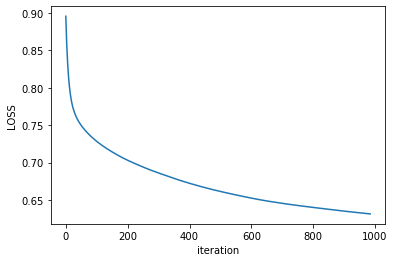

In [46]:
from matplotlib import pyplot as plt
plt.xlabel('iteration')
plt.ylabel('LOSS')
plt.plot(err_1e5[15:])
plt.savefig('err_1e5.png')

In [47]:
_,_, z2_cache = forward(features_test, w1_1e5, w2_1e5)
error_test_1e5 = mean_squared_error(z2_cache, np.reshape(lbls_test, (799,1)))
error_test_1e5

0.7252607626674202

### Learning Rate 5e-6

In [49]:
err_5e6 = []
lr = 5e-6
w1_5e6 = w1
w2_5e6 = w2

for i in range(1000):
    f = features
    z1_cache, z1_a_cache, z2_cache = forward(f, w1_5e6, w2_5e6)
    error = mean_squared_error(z2_cache, np.reshape(lbls, (800,1)))
    print(error)
    err_5e6.append(error)
    dw1, dw2 = grad(f, lbls, z1_cache, z1_a_cache, z2_cache, w1_5e6, w2_5e6)
    w1_5e6, w2_5e6 = back_prop(w1_5e6, w2_5e6, dw1, dw2, lr)

675.0694967495521
62.03744205151585
12.828072206493212
3.7213790593534952
1.887638766371898
1.48555221761332
1.3715103759660687
1.3175808407833096
1.2780510252849941
1.2435746573670434
1.2121195550529487
1.1831154640157437
1.156231588597951
1.1312651364338628
1.1081079353525423
1.0866345580742534
1.0667188554105511
1.0482178744305404
1.0310250982136442
1.0150402901727427
1.000172180607983
0.9863342545667024
0.9734476307917569
0.9614849938935623
0.9503578557276069
0.9399766865367863
0.930287469903775
0.9212411288605552
0.9127837791877594
0.9048750914511555
0.8974701216327137
0.8905342445372106
0.8840334367429716
0.8779383585991765
0.8722212265101417
0.8668550073199356
0.8618132818380064
0.8570746878783192
0.8526180018899487
0.8484242161337141
0.844475020295082
0.8407516193135156
0.8372382176275676
0.8339210155657759
0.8307853003618698
0.8278199647648811
0.8250119563940078
0.8223489724886838
0.8198232181355638
0.8174269424880715
0.8151518954623395
0.8129893434990342
0.8109292720948724
0.

0.7012082871413352
0.7011024104502832
0.7009966724410427
0.7008913480413159
0.7007874291264213
0.7006850051135654
0.7005827937710737
0.7004808090107062
0.7003790497528549
0.7002775149378364
0.7001762035196311
0.7000751195444922
0.6999741302192912
0.6998733578971491
0.6997727999526895
0.6996724593992076
0.6995723352713635
0.6994724266138208
0.6993728020772426
0.6992735711094595
0.6991744809540106
0.699075603320163
0.6989770805644483
0.6988788466077582
0.6987808686893225
0.6986831831455027
0.698585740664015
0.6984886339087126
0.698391731811017
0.6982950335093944
0.6981985574898107
0.6981023352390475
0.698006304914955
0.6979104750029156
0.6978148446731003
0.6977193864744686
0.6976240728082298
0.6975289563795419
0.6974340452608495
0.6973392893548964
0.6972446691221589
0.6971502728839051
0.6970560700579478
0.6969620598687855
0.6968682449869036
0.6967746361690792
0.6966812200877465
0.6965879844777267
0.6964949377243338
0.6964020790865292
0.6963091193925414
0.6962160239037436
0.69612312832239

0.6670207390603582
0.6669597382189698
0.6668989337374748
0.6668382674737646
0.6667776985227719
0.6667172802479007
0.6666568989749421
0.6665966205787174
0.6665364981567052
0.6664764242599724
0.6664164321806749
0.6663566004162484
0.6662968154990384
0.6662371329626765
0.6661776129132406
0.6661183818378741
0.6660595883671223
0.6660008234566007
0.6659419806470973
0.6658832159262719
0.6658245945121568
0.665766043363364
0.6657075650003376
0.6656492209688568
0.6655909547975054
0.6655327477322163
0.6654746560999307
0.6654166753196569
0.6653586750576176
0.6653005848832393
0.6652426679730878
0.6651847704473278
0.6651269630687792
0.6650693103315533
0.6650117632283113
0.6649542856853821
0.6648969147013694
0.6648396640010696
0.6647824552180316
0.664725331897172
0.6646683465371807
0.6646114067462976
0.6645545465513543
0.6644977946731351
0.6644411298454989
0.6643845357700496
0.664328079154665
0.6642718781523215
0.6642159391241715
0.6641597743555392
0.6641024342220605
0.6640452187160705
0.6639882537980

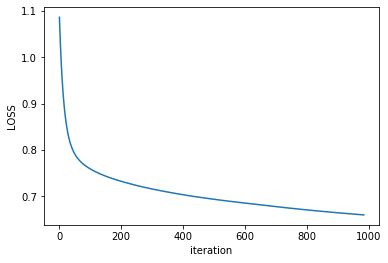

In [71]:
from matplotlib import pyplot as plt
plt.xlabel('iteration')
plt.ylabel('LOSS')
plt.plot(err_5e6[15:])
plt.savefig('err_5e6.png')

In [70]:
_,_, z2_cache = forward(features_test, w1_5e6, w2_5e6)
error_test_5e6 = mean_squared_error(z2_cache, np.reshape(lbls_test, (799,1)))
error_test_5e6

0.7383736588041552

### Learning Rate 1e-6

In [52]:
err_1e6 = []
lr = 1e-6
w1_1e6 = w1
w2_1e6 = w2

for i in range(1000):
    f = features
    z1_cache, z1_a_cache, z2_cache = forward(f, w1_1e6, w2_1e6)
    error = mean_squared_error(z2_cache, np.reshape(lbls, (800,1)))
    print(error)
    err_1e6.append(error)
    dw1, dw2 = grad(f, lbls, z1_cache, z1_a_cache, z2_cache, w1_1e6, w2_1e6)
    w1_1e6, w2_1e6 = back_prop(w1_1e6, w2_1e6, dw1, dw2, lr)

675.0694967495521
488.9243149547645
361.13527220537196
270.5658990811442
204.85128110419012
156.34669289286882
120.07796463587087
92.69141144059392
71.85612604394969
55.91446601280586
43.66436993054214
34.219427965781385
26.91710022886765
21.259578575112148
16.869133280887773
13.4577229908481
10.80398065158193
8.737748699786893
7.127626187618439
5.871975273978734
4.891994377468908
4.126543335423422
3.528122499899571
3.0597974734256406
2.6928323317032072
2.4048698839781992
2.178525246764832
2.000202312232428
1.8593363432567203
1.7476953983808354
1.6588623412259642
1.5878362720376646
1.5307178890612547
1.4844694406475936
1.4467218676077105
1.4156298134073633
1.3897552546821519
1.3679730959479925
1.349407167952039
1.3333737394303549
1.3193393746782254
1.3068885098951193
1.2956945339441313
1.2855036400414657
1.2761113494587468
1.2673609067369302
1.2591374330772516
1.2513435462928981
1.2439138217210457
1.2367852964717128
1.229906588791516
1.2232480417249942
1.2167815730924905
1.210487527492

0.7745393668238738
0.7744132463330433
0.7742876628971643
0.7741626116256365
0.7740380876872913
0.7739140863095731
0.7737906287582689
0.7736677259469619
0.7735452910001601
0.7734233593002381
0.7733019263315701
0.7731809876689626
0.7730605389402391
0.7729405758255166
0.7728210940564912
0.7727020774300053
0.7725831228371655
0.7724646377293718
0.7723466180466144
0.7722290597767995
0.7721119589550973
0.7719953116633016
0.7718791140291948
0.7717633622259277
0.7716480524714043
0.7715331810276789
0.7714187427425779
0.7713047468368112
0.7711912947190425
0.7710782657743511
0.7709656564839485
0.770853463369652
0.7707416829933417
0.7706303119564237
0.7705193468993028
0.770408784500861
0.7702986214779449
0.7701888545848599
0.7700794806128721
0.7699704963897159
0.7698618987791115
0.7697536846802863
0.7696458510275046
0.7695383947896047
0.769431312969541
0.7693246026039341
0.7692182607626259
0.7691122845482429
0.7690066710957638
0.7689014175720947
0.7687965211756493
0.7686919791359363
0.7685877887131

0.7420289017409744
0.7419796623647031
0.7419304847881435
0.7418813688364725
0.7418322932336525
0.7417832553274414
0.7417342785070267
0.741685362600716
0.7416365074375869
0.7415877128474798
0.7415389786609923
0.741490304709472
0.741441690825012
0.7413931368404448
0.7413446425893372
0.7412962079059844
0.7412478326254055
0.7411994113098527
0.7411508111044234
0.7411022701582465
0.741053788307653
0.7410053653899324
0.7409570012432696
0.7409086957066973
0.7408604486200562
0.7408122598239646
0.7407641291597911
0.7407160564696353
0.7406680415963105
0.7406200843833287
0.7405721842670536
0.7405243398472071
0.740476552614659
0.7404288224156313
0.7403811490969993
0.740333532506285
0.7402859724916522
0.7402384689019007
0.7401910215864622
0.7401436303953941
0.7400962962916038
0.7400490210421142
0.740001794989366
0.7399546140938378
0.7399074886382532
0.7398604184762231
0.7398134034619561
0.7397664434502564
0.7397195415644453
0.7396727028743625
0.7396259187900658
0.7395791891684701
0.73953251386707
0.

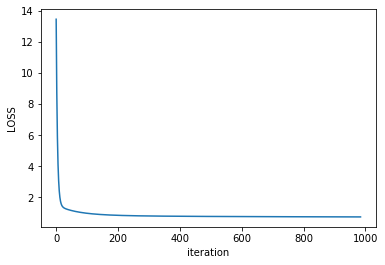

In [61]:
from matplotlib import pyplot as plt
plt.xlabel('iteration')
plt.ylabel('LOSS')
plt.plot(err_1e6[15:])
plt.savefig('err_1e6.png')

In [69]:
_,_, z2_cache = forward(features_test, w1_1e6, w2_1e6)
error_test_1e6 = mean_squared_error(z2_cache, np.reshape(lbls_test, (799,1)))
error_test_1e6

0.7852614180438355

### Comparison between 3 learning Rates

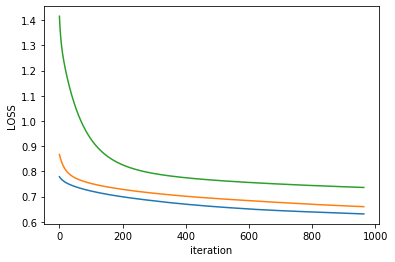

In [60]:
from matplotlib import pyplot as plt
plt.xlabel('iteration')
plt.ylabel('LOSS')
plt.plot(err_1e5[35:])
plt.plot(err_5e6[35:])
plt.plot(err_1e6[35:])
plt.savefig('Comparison.png')

In [63]:
!jupyter nbconvert --to html "CSE616 Assignment1.ipynb"

[NbConvertApp] Converting notebook CSE616 Assignment1.ipynb to html
[NbConvertApp] Writing 455677 bytes to CSE616 Assignment1.html
